In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score, explained_variance_score, precision_recall_curve
from sklearn.metrics import zero_one_loss, cohen_kappa_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('D:/Rubix_hackathon/Rubix/flask/data/fires_dataset.csv')
#display all the columns of the dataframe
pd.set_option('display.max_columns',None)

In [3]:
df.head()

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           32   71   12    0.7  57.1  2.5   8.2  0.6  2.8   
1    2      6  2012           30   73   13    4.0  55.7  2.7   7.8  0.6  2.9   
2    3      6  2012           29   80   14    2.0  48.7  2.2   7.6  0.3  2.6   
3    4      6  2012           30   64   14    0.0  79.4  5.2  15.4  2.2  5.6   
4    5      6  2012           32   60   14    0.2  77.1  6.0  17.6  1.8  6.5   

   FWI    Classes    
0  0.2  not fire     
1  0.2  not fire     
2  0.1  not fire     
3    1  not fire     
4  0.9  not fire

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [5]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [6]:
data = df.copy()
print(data.shape)
data = data.dropna(how = 'all')
print(data.shape)

(122, 14)
(122, 14)


In [7]:
data.drop(data[data['day'] == 'Sidi-Bel Abbes Region Dataset'].index, inplace = True)

In [8]:
data.drop(data[data['day'] == 'day'].index, inplace = True)

In [9]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [11]:
data['FWI'].unique()

array(['0.2', '0.1', '1', '0.9', '3.1', '6', '0.8', '1.9', '10', '16.7',
       '12.9', '0.3', '0.6', '0.4', '4.9', '1.2', '5.3', '6.7', '9.5',
       '12', '18.4', '7.2', '2.2', '0.5', '6.4', '5.2', '9.9', '15',
       '6.3', '3', '1.3', '9.6', '4.7', 'fire   ', '14.1', '7.3', '7.7',
       '9.1', '13', '17.3', '30', '25.4', '16.3', '2.5', '0.7', '3.2',
       '9', '10.9', '13.2', '14.5', '13.5', '19.5', '20.9', '12.6', '5.9',
       '12.7', '10.7', '21.6', '18.8', '10.5', '15.7', '5.5', '14.8',
       '24', '26.3', '12.2', '18.1', '24.5', '26.9', '31.1', '30.3',
       '26.1', '6.1', '16', '19.4', '0', '2.7', '3.7', '3.9', '10.3',
       '5.7', '9.8', '19.3', '17.5', '15.4', '5.6', '3.8', '13.7', '15.2',
       '6.5'], dtype=object)

In [12]:
data.columns = data.columns.str.rstrip()
data.columns = data.columns.str.lstrip()

In [13]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [14]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'not fire     ', nan, 'not fire    '],
      dtype=object)

In [15]:
data['Classes'] = data['Classes'].str.rstrip()
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [16]:
data['ISI'] = np.where(data['DC'] == '14.6 9','9',data['ISI'])
data['BUI'] = np.where(data['DC'] == '14.6 9','12.5',data['BUI'])
data['FWI'] = np.where(data['DC'] == '14.6 9','10.4',data['FWI'])
data['Classes'] = np.where(data['DC'] == '14.6 9','fire',data['Classes'])
data['DC'] = np.where(data['DC'] == '14.6 9','14.6',data['DC'])

In [17]:
data['FWI'].unique()

array(['0.2', '0.1', '1', '0.9', '3.1', '6', '0.8', '1.9', '10', '16.7',
       '12.9', '0.3', '0.6', '0.4', '4.9', '1.2', '5.3', '6.7', '9.5',
       '12', '18.4', '7.2', '2.2', '0.5', '6.4', '5.2', '9.9', '15',
       '6.3', '3', '1.3', '9.6', '4.7', '10.4', '14.1', '7.3', '7.7',
       '9.1', '13', '17.3', '30', '25.4', '16.3', '2.5', '0.7', '3.2',
       '9', '10.9', '13.2', '14.5', '13.5', '19.5', '20.9', '12.6', '5.9',
       '12.7', '10.7', '21.6', '18.8', '10.5', '15.7', '5.5', '14.8',
       '24', '26.3', '12.2', '18.1', '24.5', '26.9', '31.1', '30.3',
       '26.1', '6.1', '16', '19.4', '0', '2.7', '3.7', '3.9', '10.3',
       '5.7', '9.8', '19.3', '17.5', '15.4', '5.6', '3.8', '13.7', '15.2',
       '6.5'], dtype=object)

In [18]:
int_columns = data.columns[0:6]
int_columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws'], dtype='object')

In [19]:
float_columns = data.columns[6:-1]
float_columns

Index(['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')

In [20]:
data[int_columns] = data[int_columns].astype('int')
data[float_columns] = data[float_columns].astype('float')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int32  
 1   month        122 non-null    int32  
 2   year         122 non-null    int32  
 3   Temperature  122 non-null    int32  
 4   RH           122 non-null    int32  
 5   Ws           122 non-null    int32  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 10.6+ KB


In [22]:
data.describe()

day       month    year  Temperature          RH          Ws  \
count  122.000000  122.000000   122.0   122.000000  122.000000  122.000000   
mean    15.754098    7.500000  2012.0    33.163934   55.901639   15.008197   
std      8.843274    1.115259     0.0     3.675608   15.716186    2.692186   
min      1.000000    6.000000  2012.0    24.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   43.250000   14.000000   
50%     16.000000    7.500000  2012.0    34.000000   56.000000   15.000000   
75%     23.000000    8.000000  2012.0    36.000000   66.750000   16.750000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  122.000000  122.000000  122.000000  122.000000  122.000000  122.000000   
mean     0.678689   81.102459   17.031967   45.415574    5.863934   17.920492   
std      1.486759   12.244064   12.995068   42.927562    4.803667   13.870785   
min      0.000000   37.900000    0.900000    7.300000    0.100000    1.400000   
25%      0.000000   77.650000    7.325000   14.700000    1.825000    7.400000   
50%      0.000000   84.850000   13.150000   31.500000    4.600000   13.900000   
75%      0.475000   89.275000   22.900000   56.975000    8.625000   23.875000   
max      8.700000   96.000000   65.900000  177.300000   19.000000   68.000000   

              FWI  
count  122.000000  
mean     8.520492  
std      8.137424  
min      0.000000  
25%      0.925000  
50%      6.050000  
75%     13.650000  
max     31.100000

In [23]:
num_col = data._get_numeric_data().columns
num_col

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [24]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [25]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']

In [26]:
print(len(numerical_features))

13


In [27]:
numerical_features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [28]:
data[numerical_features].head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI
0    1      6  2012           32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2
1    2      6  2012           30  73  13   4.0  55.7  2.7   7.8  0.6  2.9  0.2
2    3      6  2012           29  80  14   2.0  48.7  2.2   7.6  0.3  2.6  0.1
3    4      6  2012           30  64  14   0.0  79.4  5.2  15.4  2.2  5.6  1.0
4    5      6  2012           32  60  14   0.2  77.1  6.0  17.6  1.8  6.5  0.9

In [29]:
date_feature = [feature for feature in numerical_features if 'day' in feature or 'year' in feature or 'month' in feature]

In [30]:
date_feature

['day', 'month', 'year']

In [31]:
for feature in date_feature:
    print(feature, data[feature].unique())

day [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
month [6 7 8 9]
year [2012]


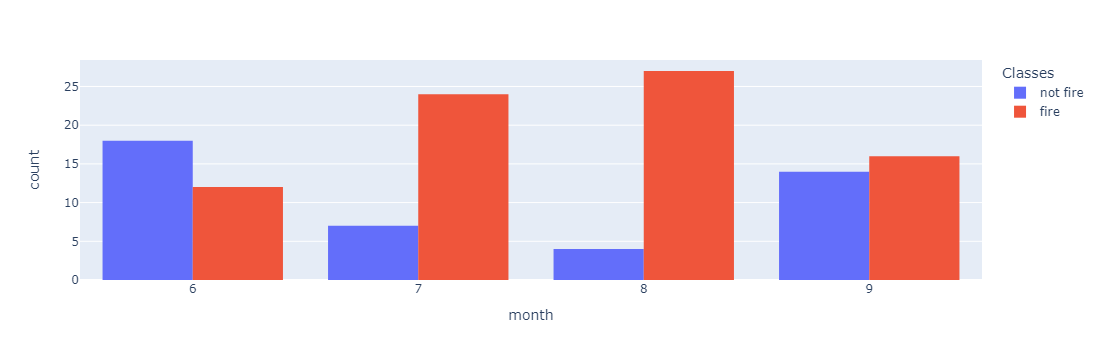

In [32]:
px.histogram(data, x='month', color="Classes", barmode='group')

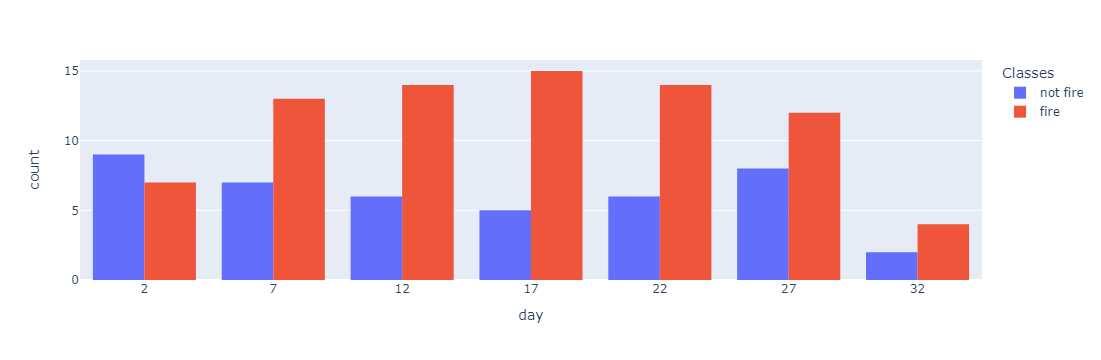

In [33]:
px.histogram(data, x='day', color="Classes", barmode='group')

In [34]:
discreate_feature = [feature for feature in numerical_features if len(data[feature].unique())<=25 and feature not in date_feature]

In [35]:
len(discreate_feature)

2

In [36]:
discreate_feature

['Temperature', 'Ws']

In [37]:
data[discreate_feature].head()

Temperature  Ws
0           32  12
1           30  13
2           29  14
3           30  14
4           32  14

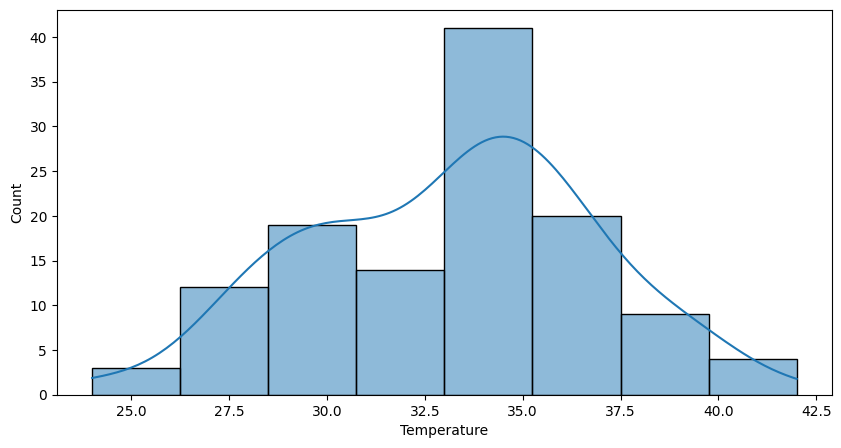

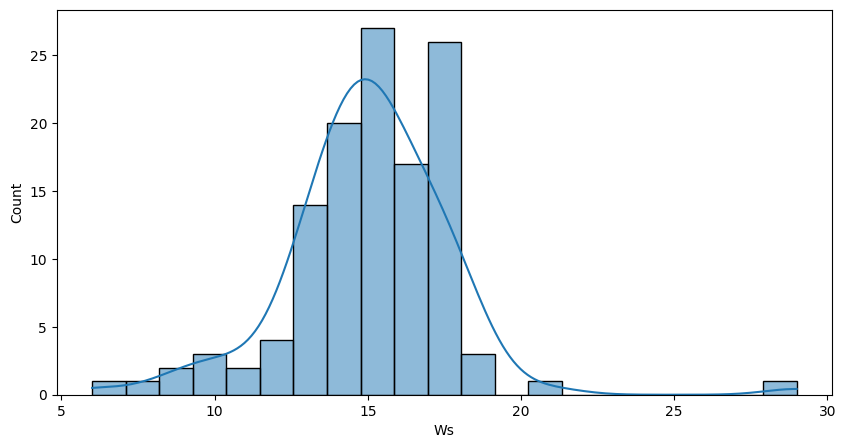

In [38]:
for i in discreate_feature:
  plt.figure(figsize=(10,5))
  sns.histplot(data = data, x=i, kde = True)
  plt.show()

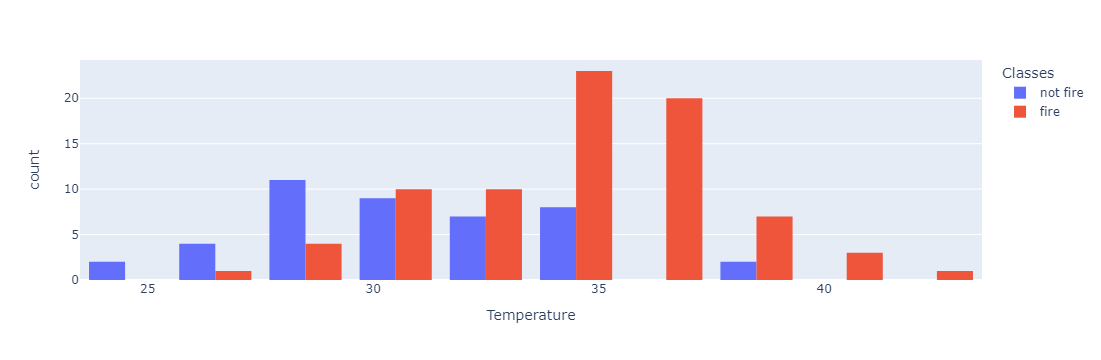

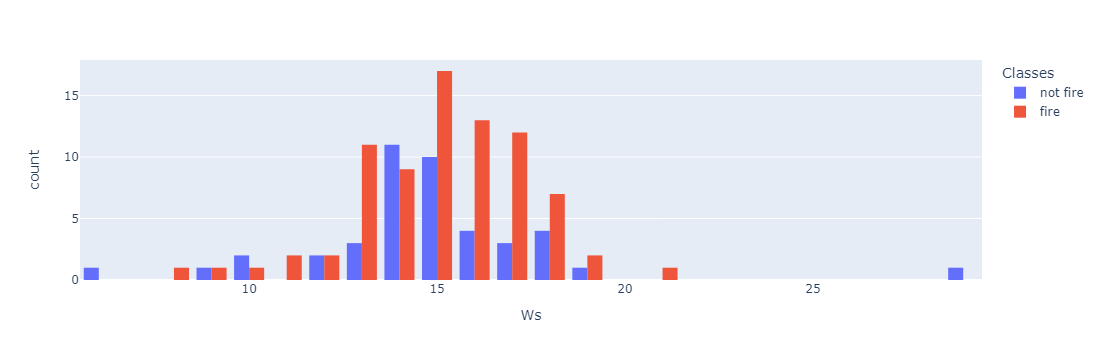

In [39]:
for i in discreate_feature:
  fig = px.histogram(data, x=i, color="Classes", barmode='group')
  fig.show()

In [40]:
continuous_feature = [feature for feature in numerical_features if feature not in discreate_feature+date_feature ]

In [41]:
continuous_feature

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

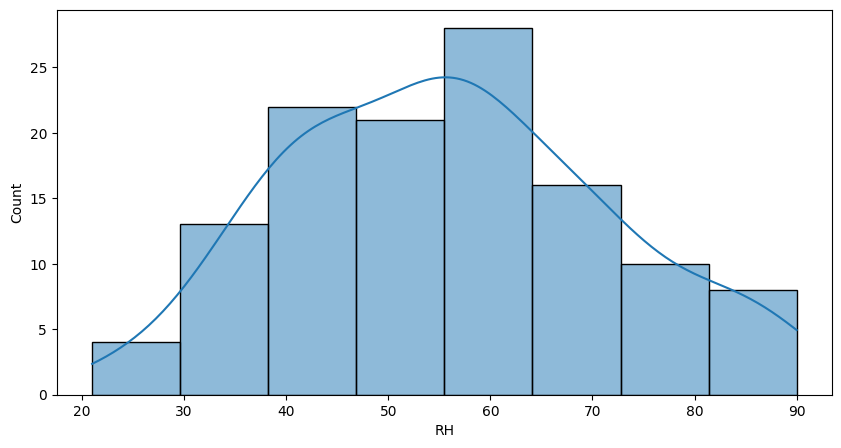

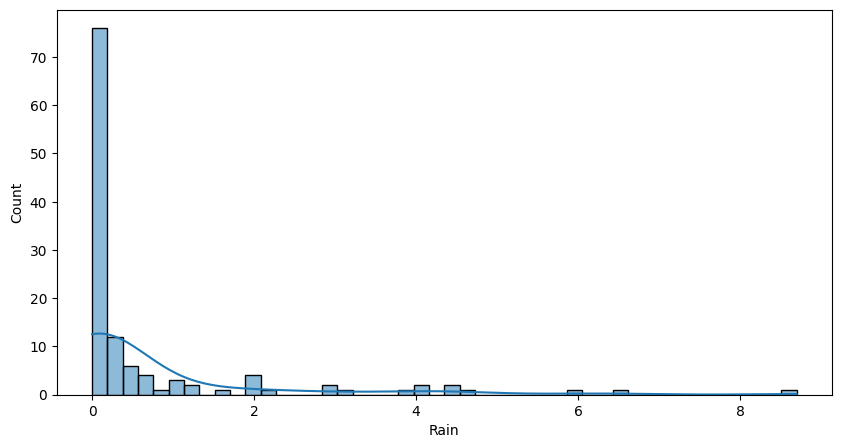

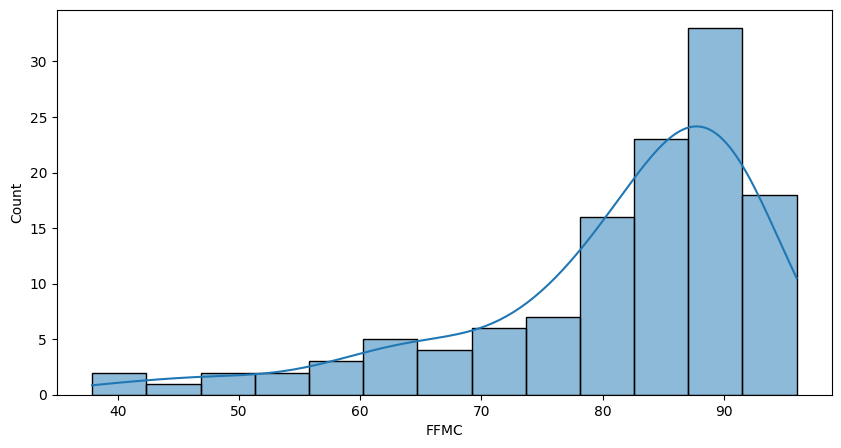

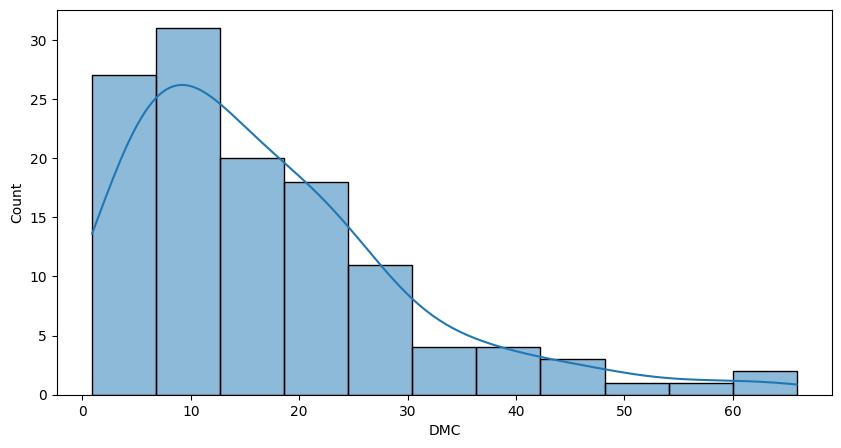

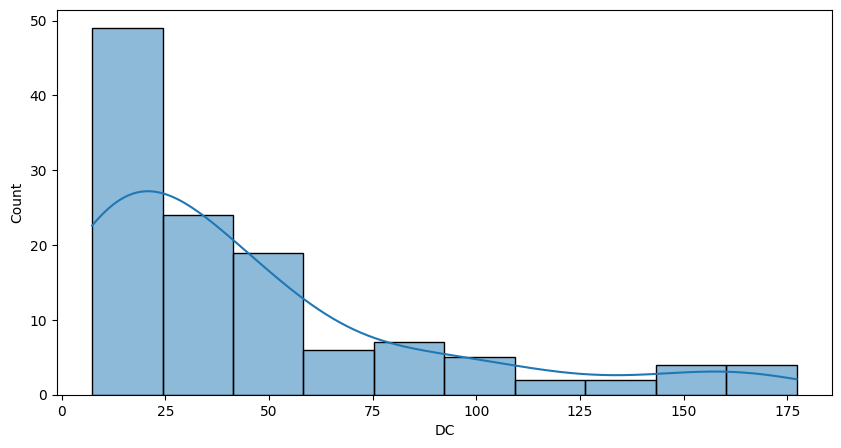

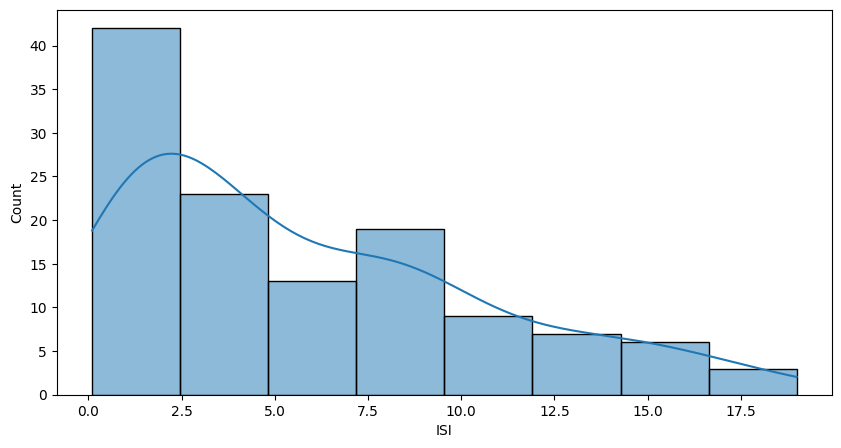

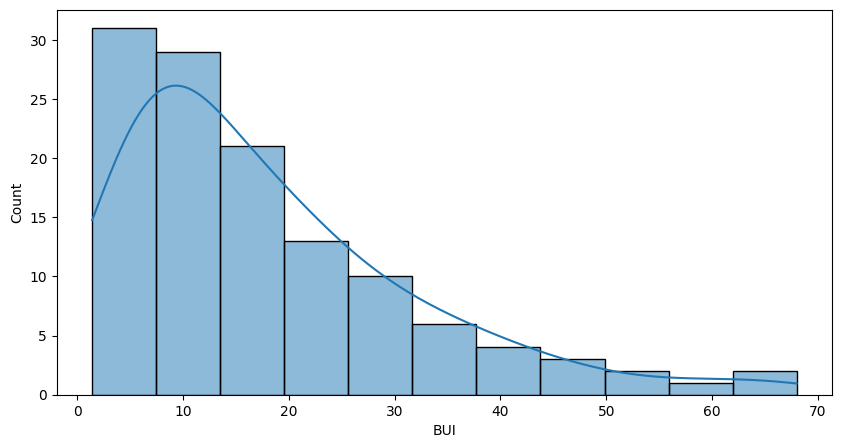

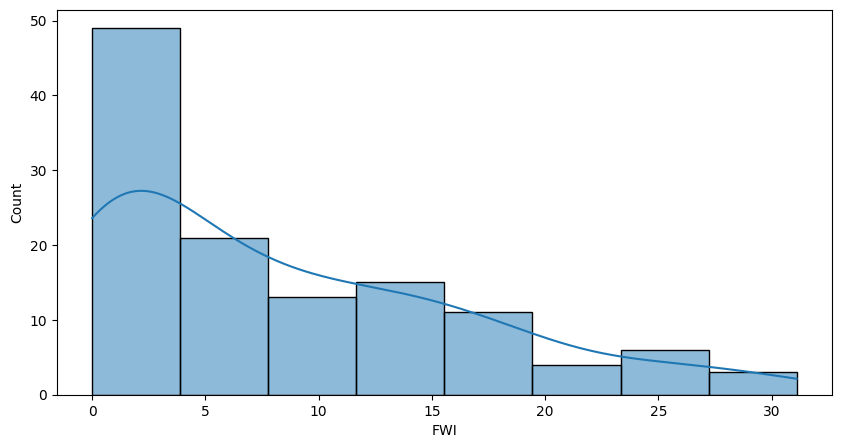

In [42]:
for i in continuous_feature:
  plt.figure(figsize=(10,5))
  sns.histplot(data = data, x=i, kde = True)
  plt.show()

Axes(0.125,0.731923;0.287037x0.148077)
Axes(0.612963,0.731923;0.287037x0.148077)
Axes(0.125,0.524615;0.287037x0.148077)
Axes(0.612963,0.524615;0.287037x0.148077)
Axes(0.125,0.317308;0.287037x0.148077)
Axes(0.612963,0.317308;0.287037x0.148077)
Axes(0.125,0.11;0.287037x0.148077)
Axes(0.612963,0.11;0.287037x0.148077)


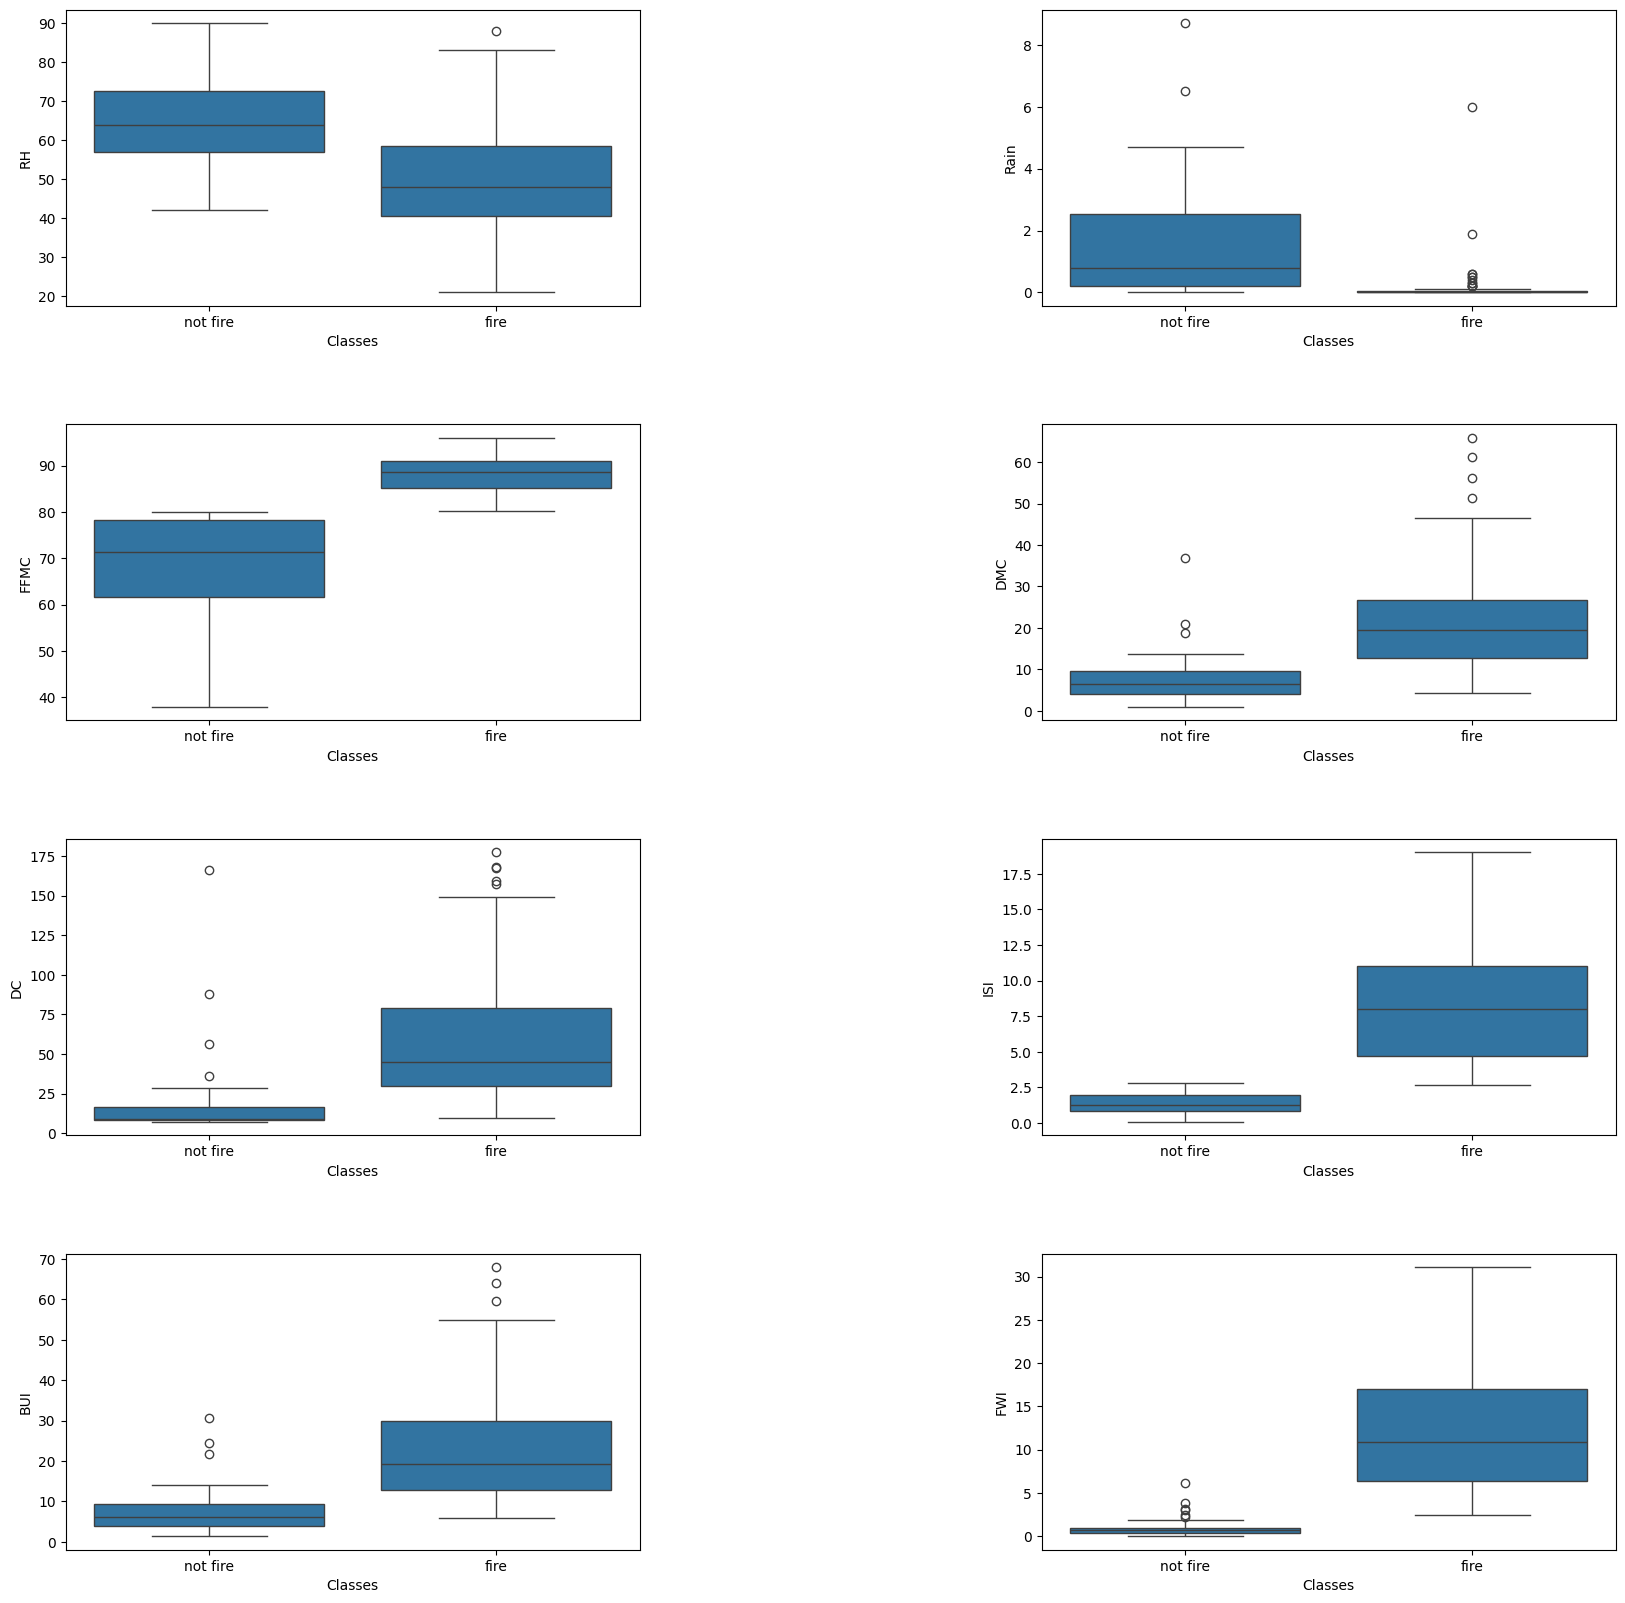

In [43]:
fig, axes = plt.subplots(4, 2, figsize=(20,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.4)
for i, ax in enumerate(axes.ravel()):
  print(ax)
  if i > 10:
    ax.set_visible(False)
    continue
  sns.boxplot(x = 'Classes', y = continuous_feature[i], data=data, ax=ax)
plt.show()

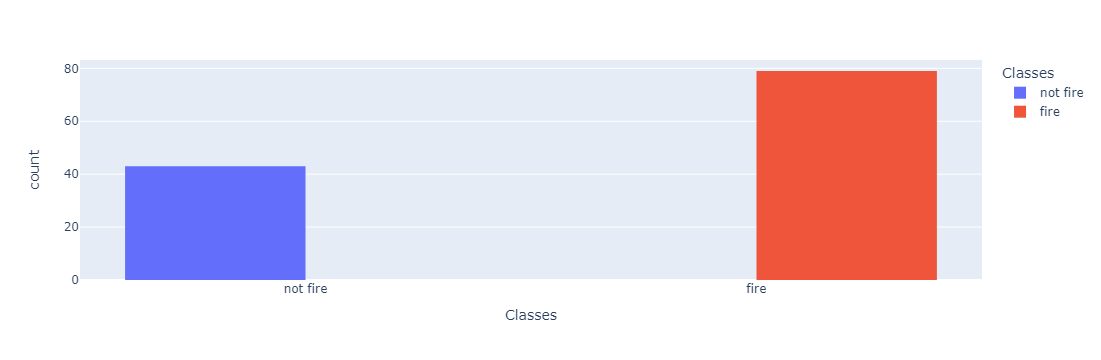

In [44]:
fig = px.histogram(data, x='Classes', color="Classes", barmode='group')
fig.show()

In [45]:
data['Classes'].value_counts()/len(data['Classes'])*100

Classes
fire        64.754098
not fire    35.245902
Name: count, dtype: float64

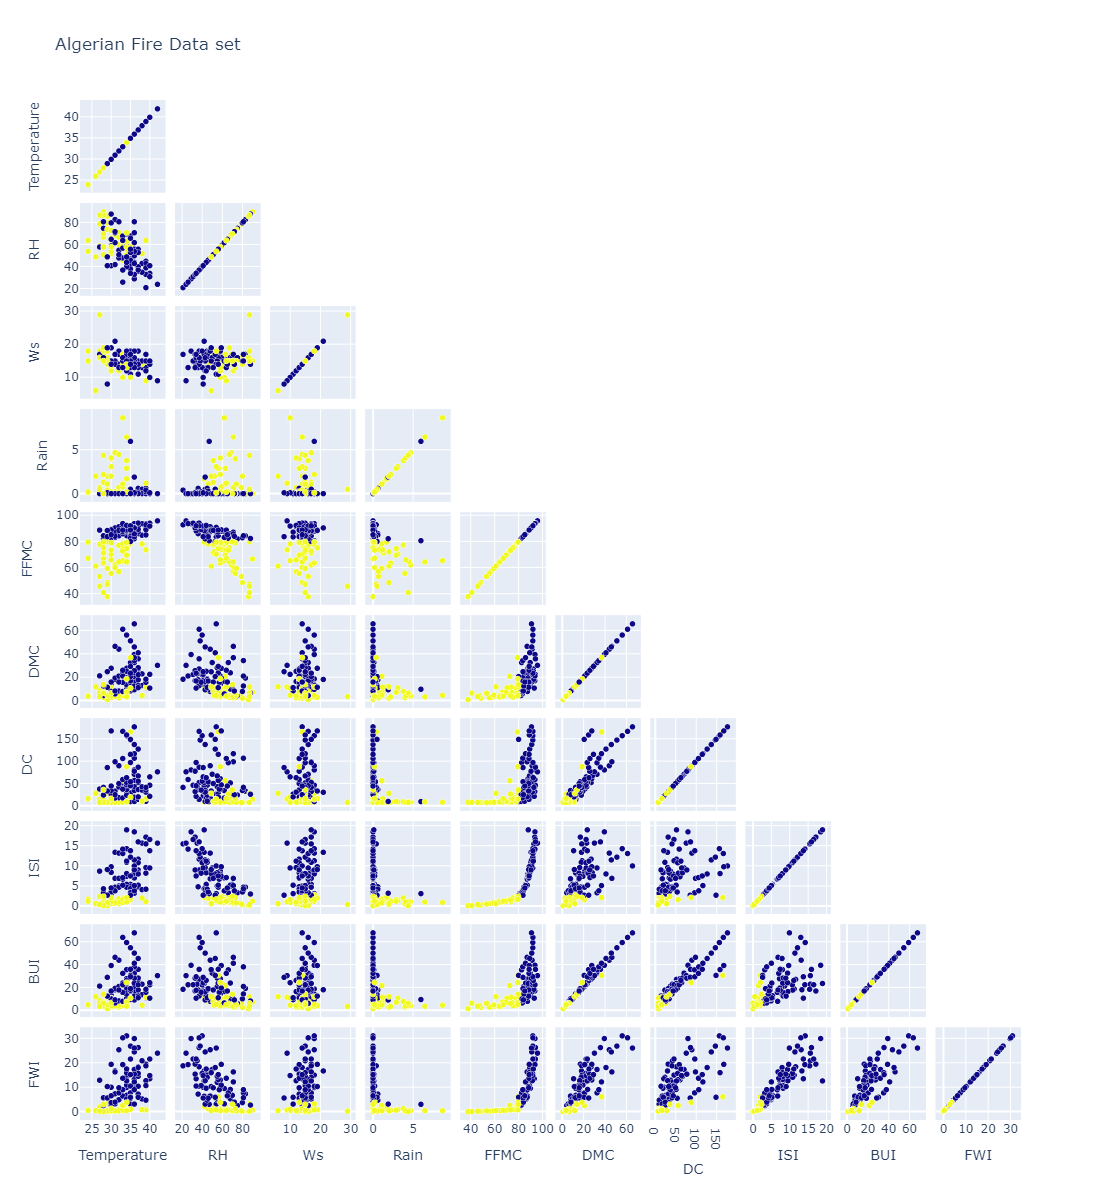

In [46]:
index_vals = data['Classes'].astype('category').cat.codes
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Temperature',
                                 values=data['Temperature']),
                            dict(label='RH',
                                 values=data['RH']),
                            dict(label='Ws',
                                 values=data['Ws']),
                            dict(label='Rain',
                                 values=data['Rain']),
                            dict(label='FFMC',
                                 values=data['FFMC']),
                            dict(label='DMC',
                                 values=data['DMC']),
                            dict(label='DC',
                                 values=data['DC']),  
                            dict(label='ISI',
                                 values=data['ISI']), 
                            dict(label='BUI',
                                 values=data['BUI']), 
                            dict(label='FWI',
                                 values=data['FWI'])                                                                                                                                                                       
                            ],
                showupperhalf=False, # remove plots on diagonal
                text=data['Classes'],
                marker=dict(color=index_vals,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='Algerian Fire Data set',
    width=1200,
    height=1200,
)

fig.show()

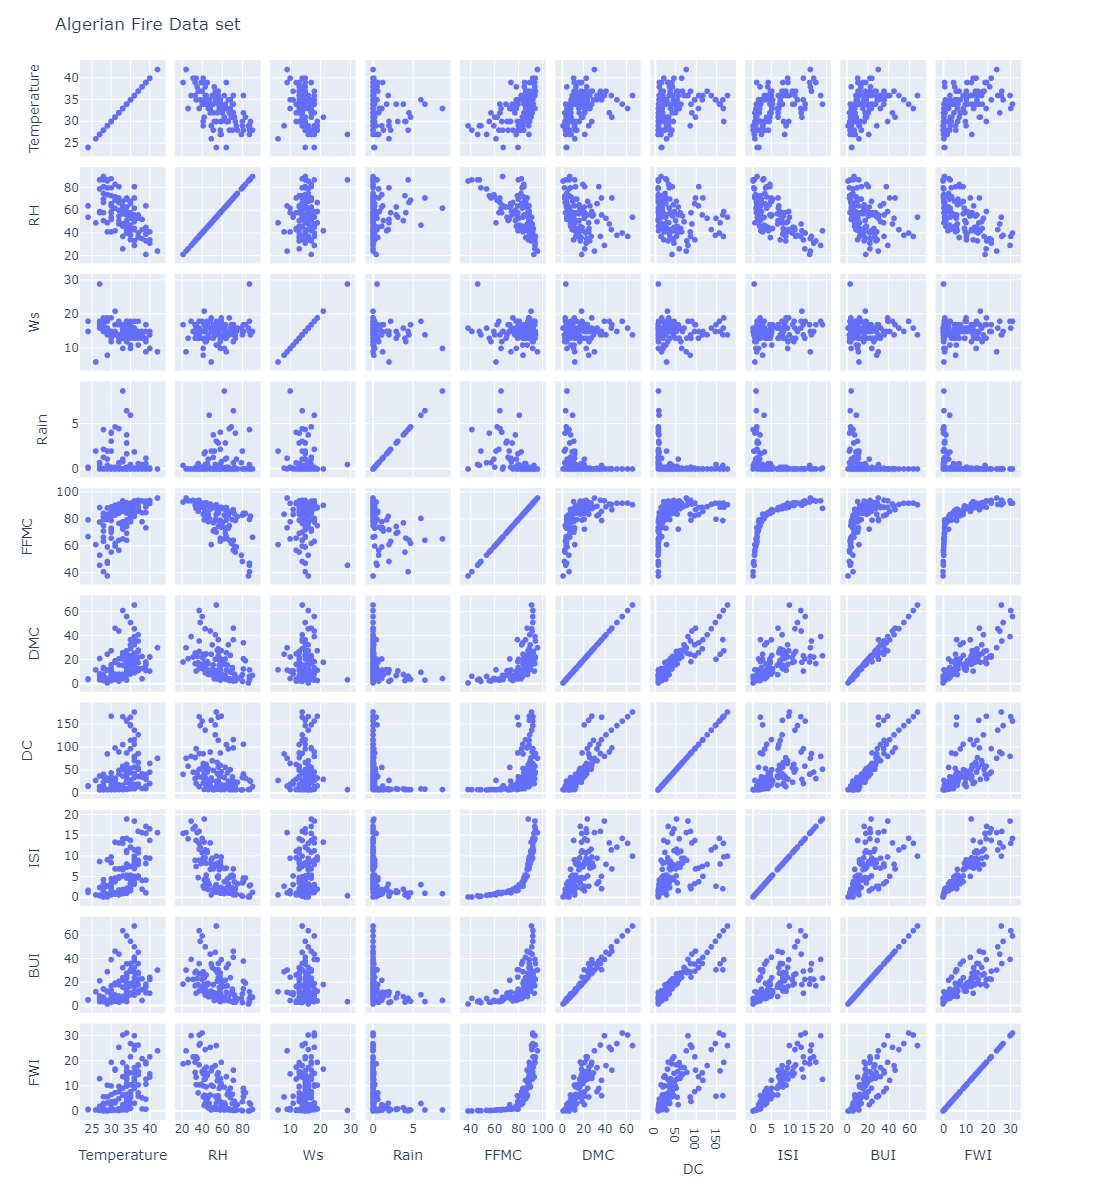

In [47]:
fig = px.scatter_matrix(data,
    dimensions=['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI'])

fig.update_layout(
    title='Algerian Fire Data set',
    width=1200,
    height=1200,
)

fig.show()

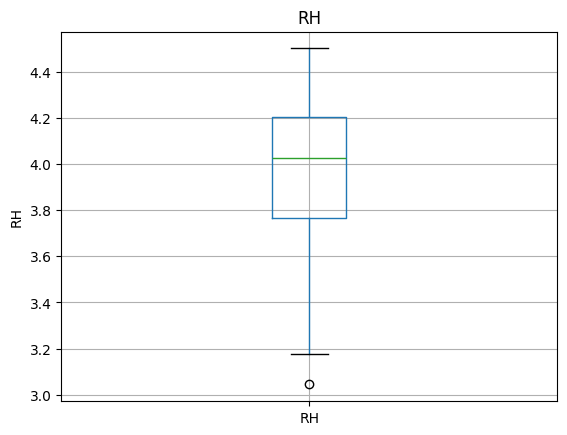

C:\Users\kaust\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

C:\Users\kaust\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning:

invalid value encountered in subtract

C:\Users\kaust\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1267: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\kaust\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1274: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\kaust\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1282: RuntimeWarning:

invalid value encountered in less



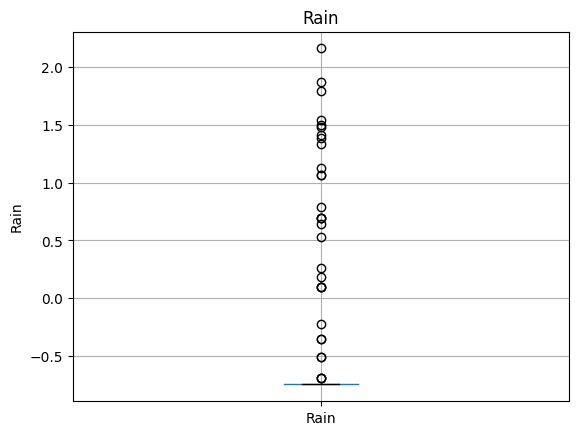

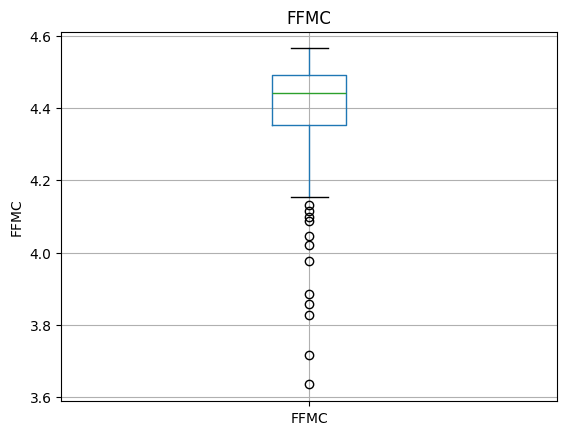

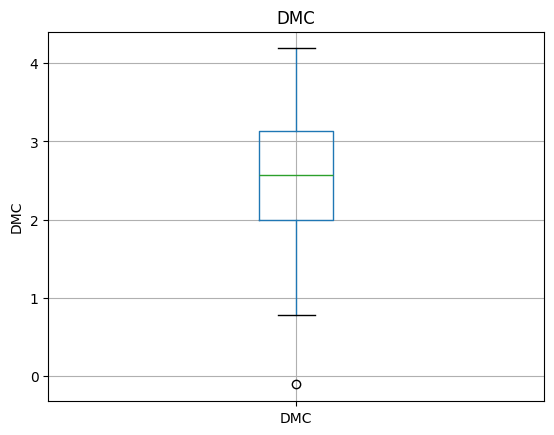

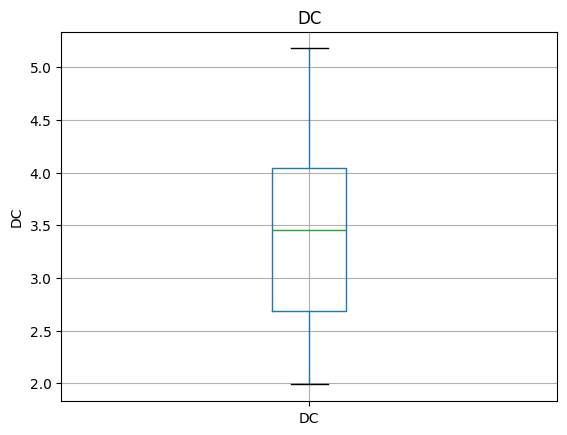

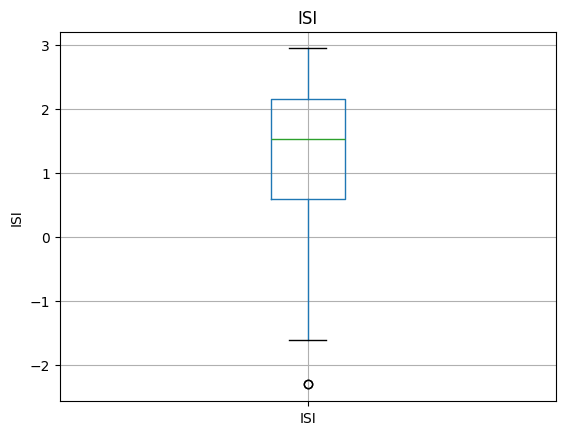

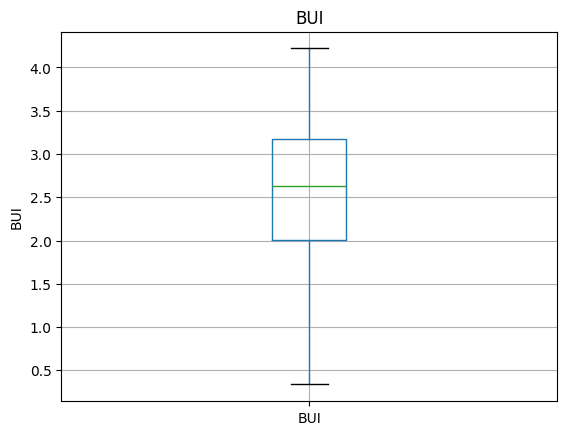

C:\Users\kaust\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



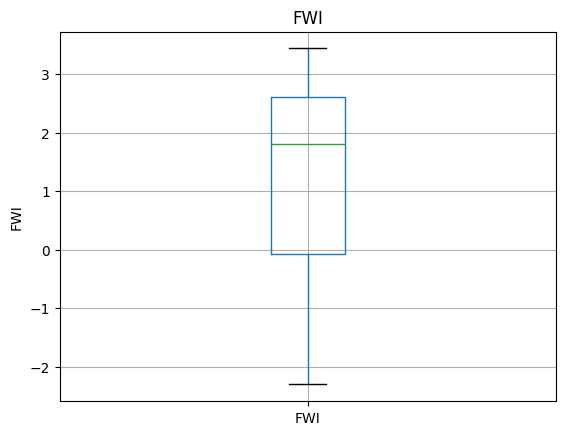

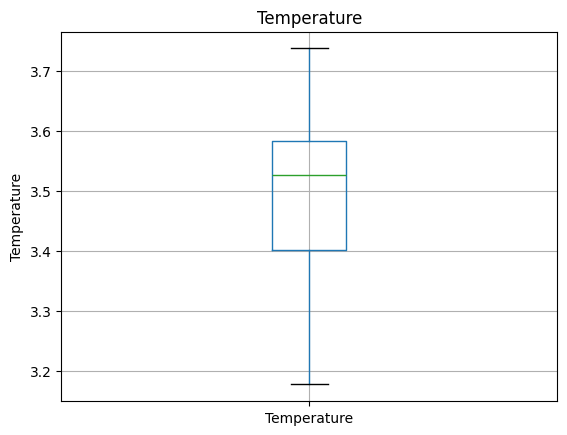

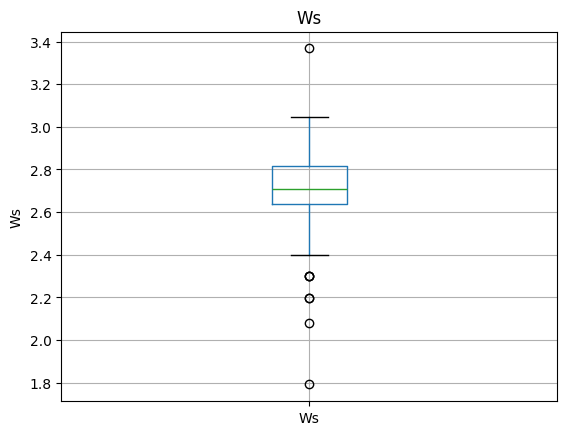

In [48]:
data1 = data.copy()
con_disc_features = continuous_feature + discreate_feature
for feature in con_disc_features:
  data1[feature] = np.log(data[feature])
  data1.boxplot(column=feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

In [49]:
data1 = data[con_disc_features]
    
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
    
ans = ((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).sum()
outlier_df = pd.DataFrame(ans).reset_index().rename(columns = {'index':'column', 0:'count_of_outliers'})
outlier_df

column  count_of_outliers
0           RH                  0
1         Rain                 20
2         FFMC                 10
3          DMC                  5
4           DC                 10
5          ISI                  1
6          BUI                  5
7          FWI                  0
8  Temperature                  0
9           Ws                  6

In [50]:
for i in con_disc_features:
  upper_bound = data[i].quantile(0.75) + 1.5*(data[i].quantile(0.75) - data[i].quantile(0.25))
  lower_bound = data[i].quantile(0.25) - 1.5*(data[i].quantile(0.75) - data[i].quantile(0.25))
  if upper_bound > 0:
    print(i, " : ",' above: ', upper_bound, 'are outliers')
  if lower_bound > 0:
    print(i, " : ",' below: ', lower_bound, 'are outliers')

RH  :   above:  102.0 are outliers
RH  :   below:  8.0 are outliers
Rain  :   above:  1.1875 are outliers
FFMC  :   above:  106.7125 are outliers
FFMC  :   below:  60.212500000000006 are outliers
DMC  :   above:  46.262499999999996 are outliers
DC  :   above:  120.38750000000002 are outliers
ISI  :   above:  18.825 are outliers
BUI  :   above:  48.587500000000006 are outliers
FWI  :   above:  32.7375 are outliers
Temperature  :   above:  45.0 are outliers
Temperature  :   below:  21.0 are outliers
Ws  :   above:  20.875 are outliers
Ws  :   below:  9.875 are outliers


In [51]:
num_data = data[con_disc_features]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

RH      Rain      FFMC       DMC        DC       ISI  \
skewness  0.206190  2.990224 -1.503348  1.443189  1.508452  0.865160   
kurtosis -0.535336  9.769806  1.962804  2.287941  1.567738 -0.152684   

               BUI       FWI  Temperature        Ws  
skewness  1.385271  0.925396    -0.154058  0.567292  
kurtosis  1.873933  0.022476    -0.430360  6.197650

In [52]:
data['Rain'].value_counts()/len(data['Rain'])*100

Rain
0.0    54.918033
0.2     8.196721
0.1     7.377049
1.1     2.459016
2.0     2.459016
0.4     2.459016
0.5     2.459016
0.7     1.639344
2.9     1.639344
0.3     1.639344
0.6     1.639344
4.5     0.819672
0.8     0.819672
4.0     0.819672
1.7     0.819672
2.2     0.819672
8.7     0.819672
4.7     0.819672
6.0     0.819672
1.9     0.819672
3.8     0.819672
1.3     0.819672
1.2     0.819672
3.1     0.819672
4.1     0.819672
6.5     0.819672
4.4     0.819672
Name: count, dtype: float64

In [53]:
corr =data[con_disc_features].corr()
corr     

RH      Rain      FFMC       DMC        DC       ISI  \
RH           1.000000  0.149027 -0.645540 -0.379057 -0.265698 -0.692335   
Rain         0.149027  1.000000 -0.510498 -0.348431 -0.344823 -0.413477   
FFMC        -0.645540 -0.510498  1.000000  0.581300  0.480658  0.753370   
DMC         -0.379057 -0.348431  0.581300  1.000000  0.882122  0.627900   
DC          -0.265698 -0.344823  0.480658  0.882122  1.000000  0.468275   
ISI         -0.692335 -0.413477  0.753370  0.627900  0.468275  1.000000   
BUI         -0.360802 -0.358060  0.577025  0.987917  0.927528  0.608683   
FWI         -0.604374 -0.410564  0.719442  0.851033  0.713884  0.915852   
Temperature -0.598309 -0.129718  0.573122  0.389748  0.284506  0.538246   
Ws           0.141436 -0.139740 -0.019406  0.028765  0.017140  0.133713   

                  BUI       FWI  Temperature        Ws  
RH          -0.360802 -0.604374    -0.598309  0.141436  
Rain        -0.358060 -0.410564    -0.129718 -0.139740  
FFMC         0.577025  0.719442     0.573122 -0.019406  
DMC          0.987917  0.851033     0.389748  0.028765  
DC           0.927528  0.713884     0.284506  0.017140  
ISI          0.608683  0.915852     0.538246  0.133713  
BUI          1.000000  0.843238     0.367756  0.029740  
FWI          0.843238  1.000000     0.500590  0.107695  
Temperature  0.367756  0.500590     1.000000 -0.258208  
Ws           0.029740  0.107695    -0.258208  1.000000

In [54]:
data['Classes'] = np.where(data['Classes'] == 'fire',1,0)

In [55]:
data['Classes'].unique()

array([0, 1])

In [56]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(122, 14)
(122, 14)


In [57]:
data = data.drop(['year','day','month'],axis=1)
data.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes
0           32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2        0
1           30  73  13   4.0  55.7  2.7   7.8  0.6  2.9  0.2        0
2           29  80  14   2.0  48.7  2.2   7.6  0.3  2.6  0.1        0
3           30  64  14   0.0  79.4  5.2  15.4  2.2  5.6  1.0        0
4           32  60  14   0.2  77.1  6.0  17.6  1.8  6.5  0.9        0

In [58]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=221)

In [59]:
X_train.shape

(85, 10)

In [60]:
X_test.shape

(37, 10)

In [61]:
y_train

30     0
10     1
88     0
17     0
77     1
      ..
9      1
114    1
52     1
102    0
76     1
Name: Classes, Length: 85, dtype: int32

In [62]:
Scale_standard = StandardScaler()

In [63]:
X_train_scaled = Scale_standard.fit_transform(X_train)

In [64]:
X_train_scaled

array([[-1.26320688e+00,  6.49142393e-02,  1.10978690e+00,
         8.22035196e-01, -1.14853752e+00, -9.68013126e-01,
        -8.20028396e-01, -8.75644370e-01, -9.71338028e-01,
        -9.05989705e-01],
       [-4.57912496e-01, -9.49837088e-01,  2.15791897e+00,
        -4.85112607e-01,  8.29566608e-01,  1.61497934e-01,
        -3.15287571e-01,  1.58317830e+00,  7.28733340e-02,
         1.06860324e+00],
       [ 6.15813356e-01, -6.19296766e-02, -2.87722530e-01,
        -2.47449370e-01, -8.73774402e-03,  1.57715180e+00,
         2.79345706e+00, -6.94255813e-01,  9.67911644e-01,
        -2.23414365e-01],
       [ 7.89504303e-02,  3.18602071e-01, -1.68523196e+00,
         4.68406280e+00, -1.01617368e+00, -8.62592094e-01,
        -8.24616949e-01, -9.36107223e-01, -8.93199763e-01,
        -9.18178550e-01],
       [ 2.49483360e+00, -2.09143233e+00, -2.03460932e+00,
        -4.85112607e-01,  1.22665814e+00,  1.07263686e+00,
         7.37785332e-01,  2.04672684e+00,  9.53704687e-01,
         1.

In [65]:
X_test_scaled = Scale_standard.fit_transform(X_test)

In [66]:
X_test_scaled

array([[ 0.54506379,  1.82623927, -0.2011028 , -0.47657569, -0.23331515,
         1.27879576,  1.44907725, -0.65689279,  1.39273684, -0.1130075 ],
       [ 0.85062985, -1.08858184,  1.1940479 , -0.2133921 ,  0.5755107 ,
        -0.53907777, -0.82459539,  0.56422965, -0.58744979,  0.06878718],
       [ 0.54506379,  0.56756652,  0.26394743, -0.47657569,  0.40441292,
        -0.23468964, -0.33491914,  0.09456717, -0.28578074, -0.04808083],
       [ 0.23949772, -0.6248603 ,  0.72899767, -0.2133921 ,  0.06221737,
        -0.79273454, -0.47271748, -0.28116281, -0.72668167, -0.50256752],
       [-0.06606834,  0.30258278,  0.26394743, -0.47657569,  0.45107595,
         0.72075086,  0.31962299,  0.16501655,  0.58828602,  0.40640586],
       [-3.12172895,  0.03759904,  1.1940479 , -0.3449839 , -0.85548888,
        -1.26622718, -0.80983128, -1.1500384 , -1.15984749, -1.19079023],
       [ 0.54506379, -1.35356558, -1.13120328, -0.3449839 ,  0.83993453,
         0.55164635,  0.73055733,  0.56422965

In [67]:
bestfeatures = SelectKBest(f_classif, k=6)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print  feature scores of all

         Specs       Score
4         FFMC  152.030984
7          ISI   84.198545
9          FWI   79.713339
8          BUI   40.079592
5          DMC   36.450429
0  Temperature   27.134563
1           RH   24.369355
6           DC   24.329250
3         Rain   22.631284
2           Ws    0.023378


In [68]:
model_dict = {'Logistic Regression' : LogisticRegression(random_state=3),
              'K Nearest Neighbor': KNeighborsClassifier(),
              'SVC' : SVC(),
              }

def model_score_df(model_dict, xtr,ytr,xte,yte):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(xtr, ytr)
        y_pred = v.predict(xte)
        ac_score_list.append(accuracy_score(yte, y_pred))
        p_score_list.append(precision_score(yte, y_pred, average='macro'))
        r_score_list.append(recall_score(yte, y_pred, average='macro'))
        f1_score_list.append(f1_score(yte, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df

model_score_df(model_dict,X_train_scaled,y_train,X_test_scaled,y_test)

model_name accuracy_score precision_score recall_score f1_score
0  Logistic Regression       0.918919           0.875     0.946429  0.90027
1   K Nearest Neighbor       0.918919           0.875     0.946429  0.90027
2                  SVC       0.918919           0.875     0.946429  0.90027

In [69]:
model_dict1 = {'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB()
}

In [70]:
model_score_df(model_dict1,X_train,y_train,X_test,y_test)

model_name accuracy_score precision_score recall_score  f1_score
1        Decsision Tree            1.0             1.0          1.0       1.0
3  Gaussian Naive Bayes            1.0             1.0          1.0       1.0
0         Random Forest       0.972973        0.982759     0.944444  0.961816
2              AdaBoost       0.972973        0.982759     0.944444  0.961816

In [71]:
model = LogisticRegression()
grid_vals = {'C': [0.001,0.01,0.1,1]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

In [72]:
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, return_train_score=True,
             scoring='accuracy')

In [73]:
print(grid_lr.best_estimator_)
print(grid_lr.best_params_)
print(grid_lr.best_index_)
print(grid_lr.best_score_)

LogisticRegression(C=1)
{'C': 1}
3
0.9309523809523809


In [74]:
model_rf = RandomForestClassifier()
grid_vals_rf = {'n_estimators' : [50,100,150,200], 'max_depth' : [3,5,7,9], 'n_jobs' : [3,5]}
grid_rf = GridSearchCV(estimator=model_rf, param_grid=grid_vals_rf, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

In [75]:
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200],
                         'n_jobs': [3, 5]},
             return_train_score=True, scoring='accuracy')

In [76]:
print(grid_rf.best_estimator_)
print(grid_rf.best_params_)
print(grid_rf.best_index_)
print(grid_rf.best_score_)

RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=3)
{'max_depth': 7, 'n_estimators': 50, 'n_jobs': 3}
16
1.0


In [77]:
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_rf))
print("Precision Score : ", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall Score : ", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score : ", f1_score(y_test, y_pred_rf, average='macro'))

Accuracy Score :  0.972972972972973
Precision Score :  0.9827586206896552
Recall Score :  0.9444444444444444
F1 Score :  0.9618163054695562


In [78]:
model_dt = DecisionTreeClassifier()
grid_vals_dt = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}
grid_dt = GridSearchCV(estimator=model_dt, param_grid=grid_vals_dt, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True)

In [79]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [80]:
print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_index_)
print(grid_dt.best_score_)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
2
1.0


In [81]:
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_dt))
print("Precision Score : ", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall Score : ", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score : ", f1_score(y_test, y_pred_dt, average='macro'))

Accuracy Score :  0.972972972972973
Precision Score :  0.9827586206896552
Recall Score :  0.9444444444444444
F1 Score :  0.9618163054695562


In [82]:
filename = 'fire_prediction_model.pkl'
pickle.dump(grid_rf.best_estimator_, open(filename, 'wb'))